In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score
from catboost import CatBoostClassifier
import shap
from catboost import Pool

sns.set();
df = pd.read_parquet("/Users/nikita/python_projects/add_datatest/src/input/dataset.parquet")

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score
from catboost import CatBoostClassifier
import shap

sns.set();
df = pd.read_parquet("/Users/nikita/python_projects/add_datatest/src/input/dataset.parquet")

In [23]:
display(df)

,borrow_block_number,borrow_timestamp,wallet_address,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,...,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count,target
0,7711117,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973049.0,199,438,-239,0.397391,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,1
1,7711123,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973188.0,200,439,-239,0.399063,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
2,7711126,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973238.0,201,440,-239,0.400895,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
3,7711672,1.557205e+09,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,1.557191e+09,1.557198e+09,13922.0,8,56,-48,0.604001,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,0
4,7712572,1.557217e+09,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410,1.557217e+09,1.557217e+09,264.0,2,3,-1,0.003008,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442956,18250961,1.696106e+09,0x3dc6d0168838c40e26d105115908ee833b24e56a,1.677567e+09,1.696106e+09,18539076.0,68,91,-23,0.352223,...,-0.992921,3.327281,21.642831,116.954834,-0.430690,0.018477,1.018477,0,1,0
442957,18251701,1.696115e+09,0x3af16178664dd4b2500c9d02c53347e86b3e7873,1.624471e+09,1.695934e+09,71643811.0,154,168,-14,1.382943,...,-0.992921,3.327281,21.642831,116.954834,-0.430690,0.018477,1.018477,1,1,1
442958,18251742,1.696116e+09,0xba01430a43496df98956e42aab08eb85ca107bb1,1.613776e+09,1.696116e+09,82339560.0,163,310,-147,1.218006,...,-0.992921,3.327281,21.642831,116.954834,-0.430690,0.018477,1.018477,1,1,1
442959,18251864,1.696117e+09,0x1f2b17bff4a0313ec6342eef464742ad1c2de83c,1.671973e+09,1.695933e+09,24144360.0,117,221,-104,0.738964,...,-0.992921,3.327281,21.642831,116.954834,-0.430690,0.018477,1.018477,1,1,0


In [24]:
df.columns

Index(['borrow_block_number', 'borrow_timestamp', 'wallet_address',
       'first_tx_timestamp', 'last_tx_timestamp', 'wallet_age',
       'incoming_tx_count', 'outgoing_tx_count', 'net_incoming_tx_count',
       'total_gas_paid_eth', 'avg_gas_paid_per_tx_eth', 'risky_tx_count',
       'risky_unique_contract_count', 'risky_first_tx_timestamp',
       'risky_last_tx_timestamp', 'risky_first_last_tx_timestamp_diff',
       'risky_sum_outgoing_amount_eth', 'outgoing_tx_sum_eth',
       'incoming_tx_sum_eth', 'outgoing_tx_avg_eth', 'incoming_tx_avg_eth',
       'max_eth_ever', 'min_eth_ever', 'total_balance_eth', 'risk_factor',
       'total_collateral_eth', 'total_collateral_avg_eth',
       'total_available_borrows_eth', 'total_available_borrows_avg_eth',
       'avg_weighted_risk_factor', 'risk_factor_above_threshold_daily_count',
       'avg_risk_factor', 'max_risk_factor', 'borrow_amount_sum_eth',
       'borrow_amount_avg_eth', 'borrow_count', 'repay_amount_sum_eth',
       'repay_am

In [25]:
df["index"] = df.index

In [26]:
df["subset"] = "train"
df = df.sample(frac=1)
df["subset"][200000:300000] = "val"
df["subset"][300000:] = "test"


/var/folders/5r/k_g1yy617_z_4pflgbk8gn2r0000gn/T/ipykernel_42255/3723495643.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["subset"][200000:300000] = "val"
/var/folders/5r/k_g1yy617_z_4pflgbk8gn2r0000gn/T/ipykernel_42255/3723495643.p

In [27]:
tech = ["index"]
features = ['borrow_block_number', 'borrow_timestamp',
       'first_tx_timestamp', 'last_tx_timestamp', 'wallet_age',
       'incoming_tx_count', 'outgoing_tx_count', 'net_incoming_tx_count',
       'total_gas_paid_eth', 'avg_gas_paid_per_tx_eth', 'risky_tx_count',
       'risky_unique_contract_count', 'risky_first_tx_timestamp',
       'risky_last_tx_timestamp', 'risky_first_last_tx_timestamp_diff',
       'risky_sum_outgoing_amount_eth', 'outgoing_tx_sum_eth',
       'incoming_tx_sum_eth', 'outgoing_tx_avg_eth', 'incoming_tx_avg_eth',
       'max_eth_ever', 'min_eth_ever', 'total_balance_eth', 'risk_factor',
       'total_collateral_eth', 'total_collateral_avg_eth',
       'total_available_borrows_eth', 'total_available_borrows_avg_eth',
       'avg_weighted_risk_factor', 'risk_factor_above_threshold_daily_count',
       'avg_risk_factor', 'max_risk_factor', 'borrow_amount_sum_eth',
       'borrow_amount_avg_eth', 'borrow_count', 'repay_amount_sum_eth',
       'repay_amount_avg_eth', 'repay_count', 'borrow_repay_diff_eth',
       'deposit_count', 'deposit_amount_sum_eth', 'time_since_first_deposit',
       'withdraw_amount_sum_eth', 'withdraw_deposit_diff_if_positive_eth',
       'liquidation_count', 'time_since_last_liquidated',
       'liquidation_amount_sum_eth', 'market_adx', 'market_adxr', 'market_apo',
       'market_aroonosc', 'market_aroonup', 'market_atr', 'market_cci',
       'market_cmo', 'market_correl', 'market_dx', 'market_fastk',
       'market_fastd', 'market_ht_trendmode', 'market_linearreg_slope',
       'market_macd_macdext', 'market_macd_macdfix', 'market_macd',
       'market_macdsignal_macdext', 'market_macdsignal_macdfix',
       'market_macdsignal', 'market_max_drawdown_365d', 'market_natr',
       'market_plus_di', 'market_plus_dm', 'market_ppo', 'market_rocp',
       'market_rocr', 'unique_borrow_protocol_count',
       'unique_lending_protocol_count']

In [28]:
def plot_univariate_by_target(
    df: pd.DataFrame,
    features: list[str] | None = None,
    target: str = "target",
    bins: int = 50,
    sample: int | None = 200_000,
    palette: str = "Set2",
    max_plots: int | None = None,
):
   
    if target not in df.columns:
        print(f"Target '{target}' не найден в колонках")
        return

    if features is None:
        features = df.select_dtypes(include=[np.number]).columns.tolist()
        if target in features:
            features.remove(target)

    num_cols = [c for c in features if c in df.columns and pd.api.types.is_numeric_dtype(df[c])]

    data = df
    if sample is not None and len(df) > sample:
        data = df.sample(sample, random_state=42)

    data = data.dropna(subset=[target])

    shown = 0
    for col in num_cols:
        if data[col].dropna().empty:
            continue
        fig, axes = plt.subplots(1, 2, figsize=(10, 3))
        sns.histplot(data=data, x=col, hue=target, bins=bins, stat="density", common_norm=False, palette=palette, ax=axes[0])
        axes[0].set_title(f"Hist • {col} by {target}")
        sns.boxplot(data=data, x=target, y=col, hue=target, palette=palette, dodge=False, ax=axes[1])
        axes[1].set_title(f"Box • {col} by {target}")
        leg = axes[1].get_legend()
        if leg is not None:
            leg.remove()
        fig.tight_layout()
        plt.show()
        shown += 1
        if max_plots is not None and shown >= max_plots:
            break


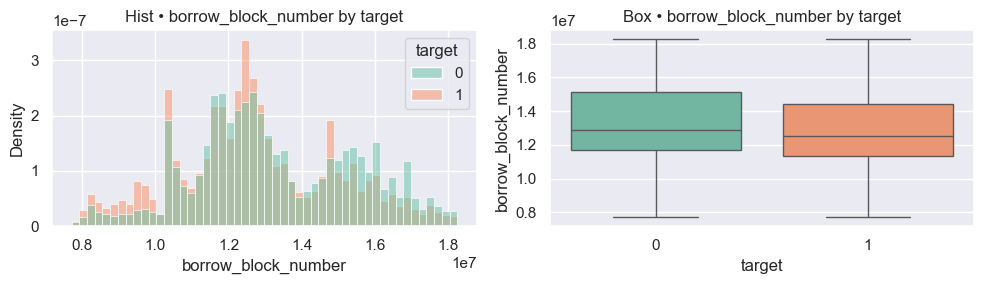

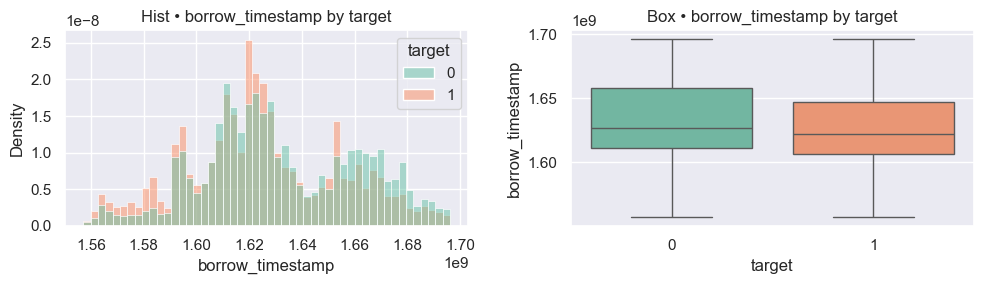

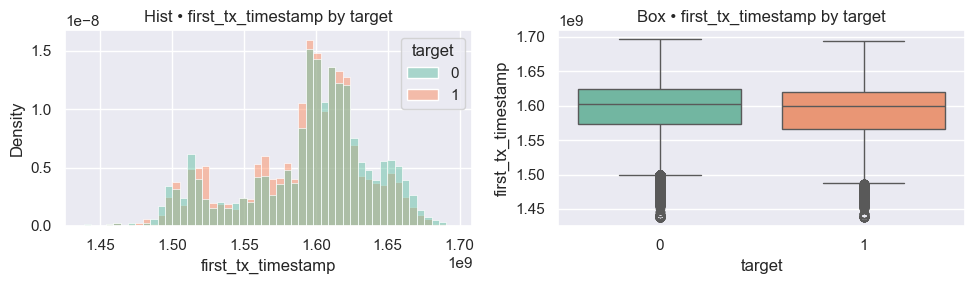

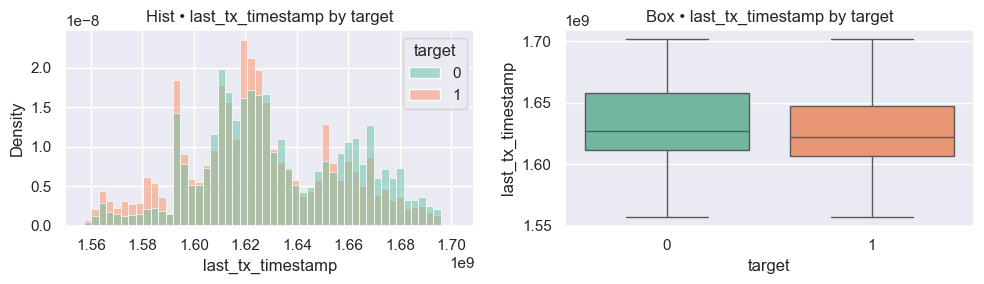

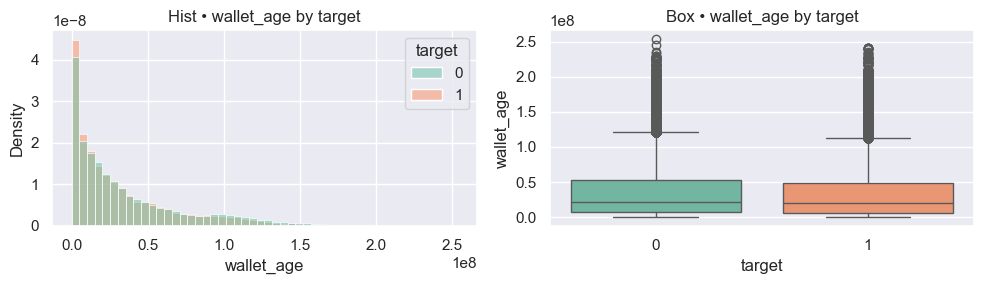

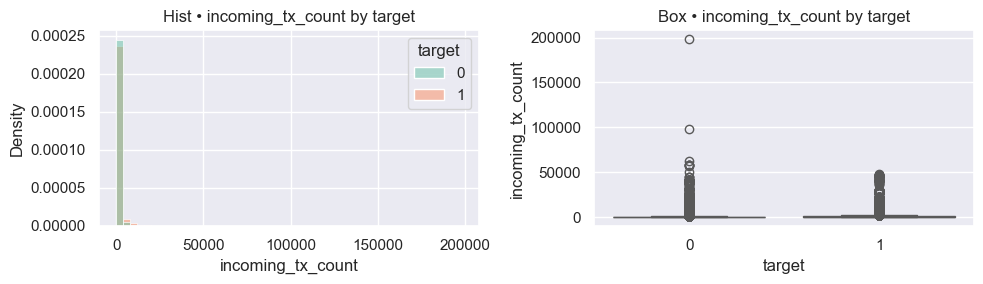

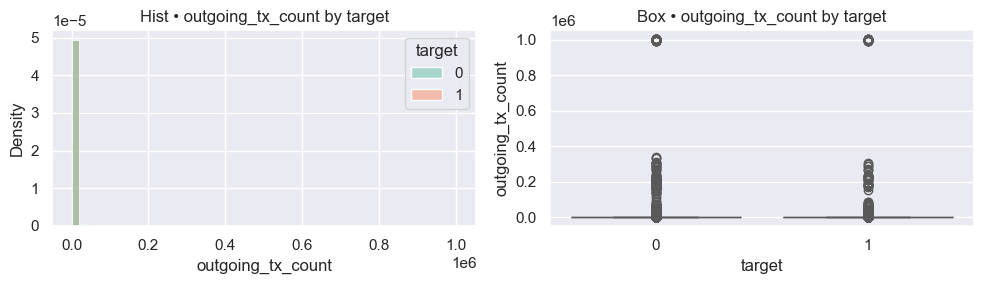

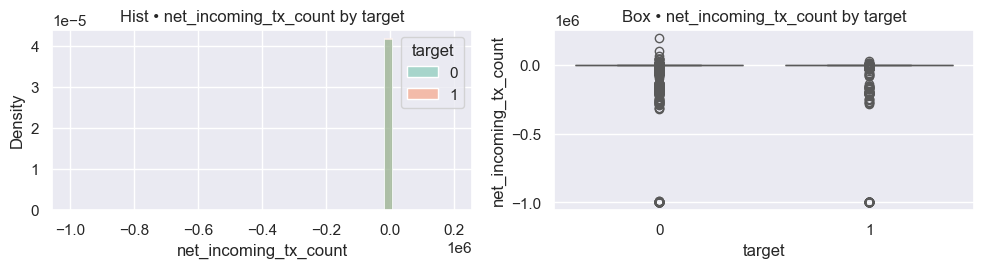

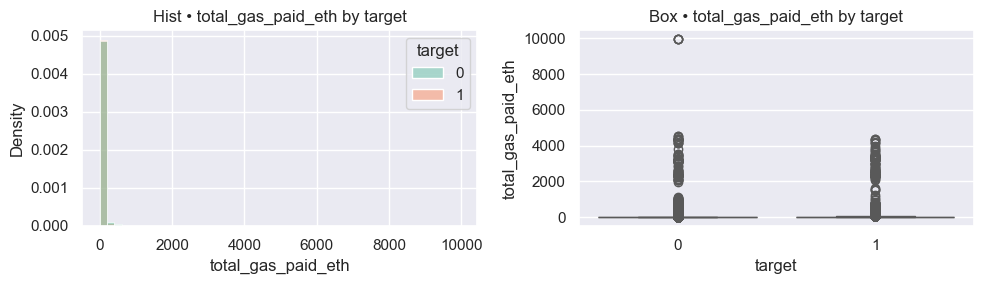

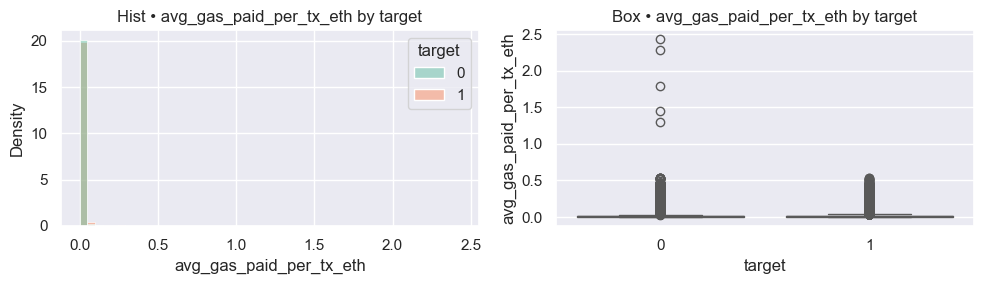

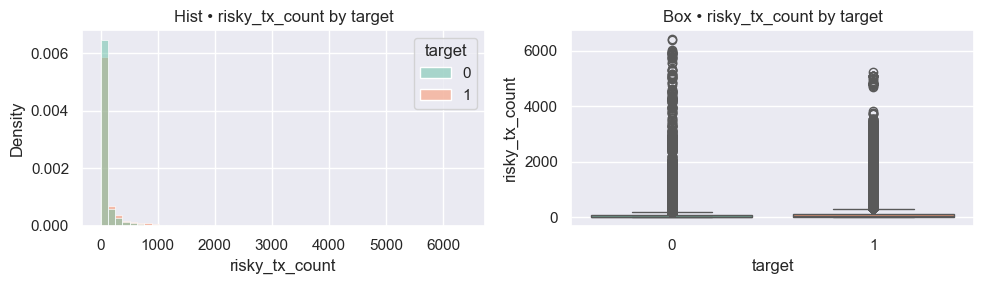

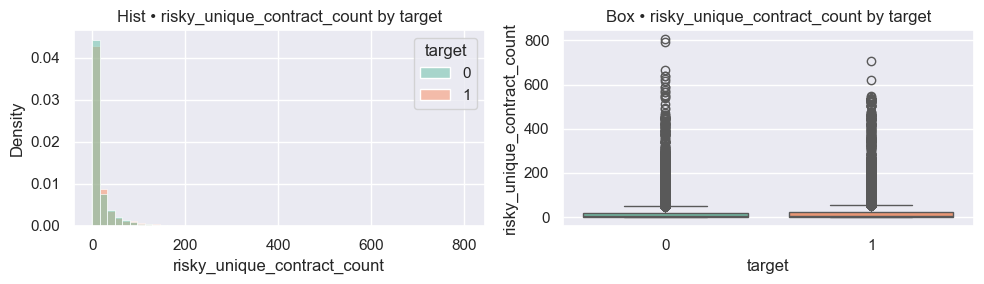

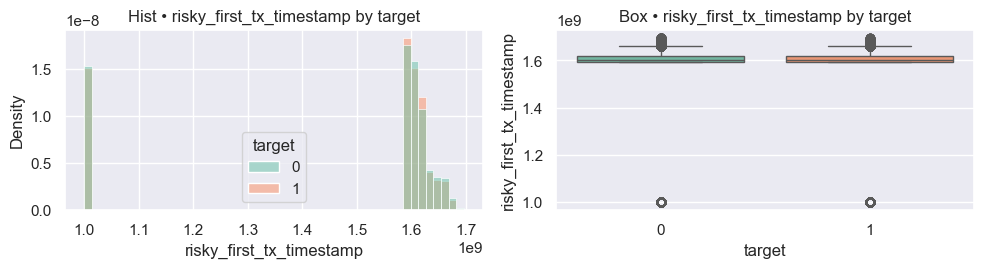

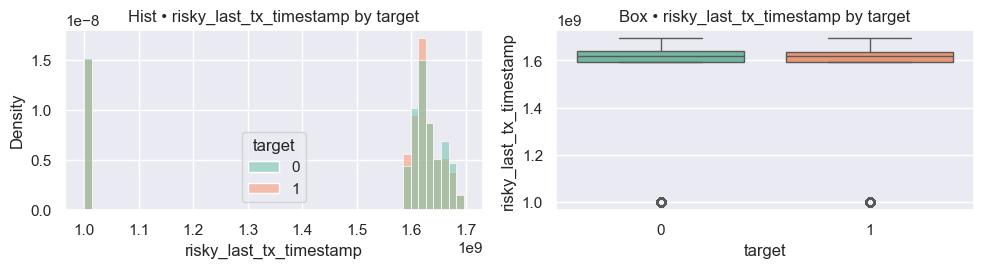

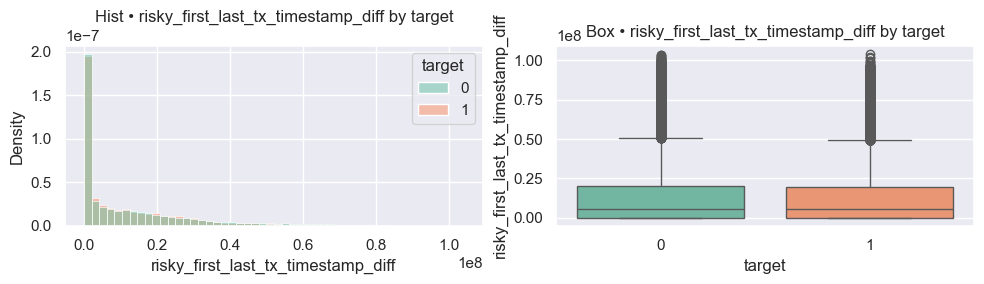

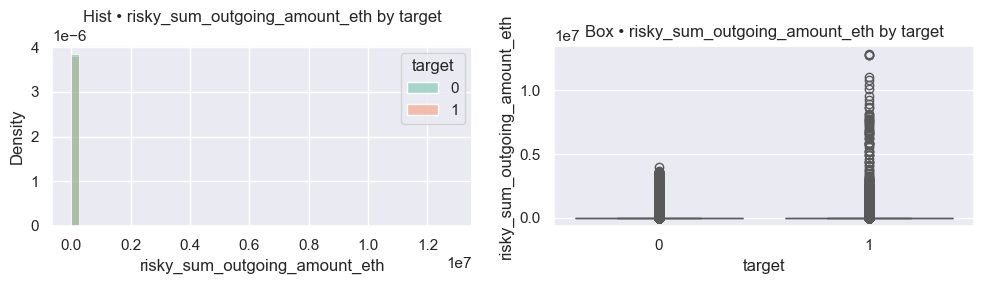

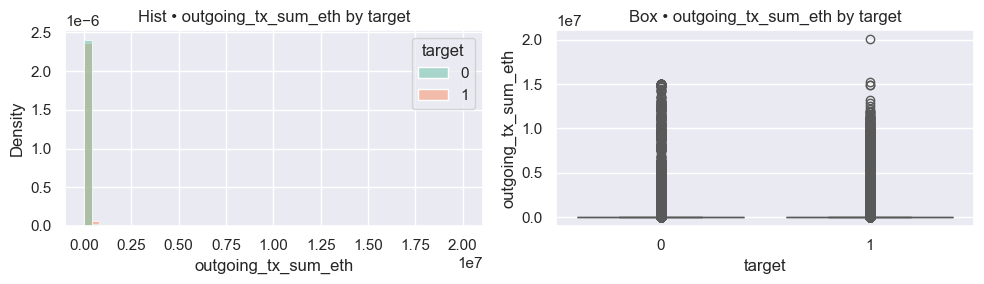

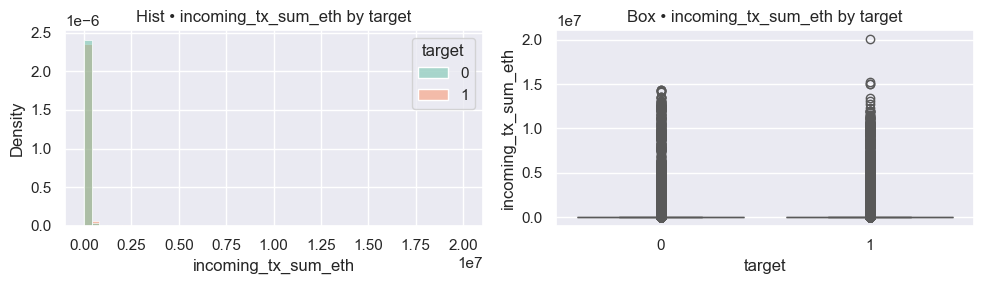

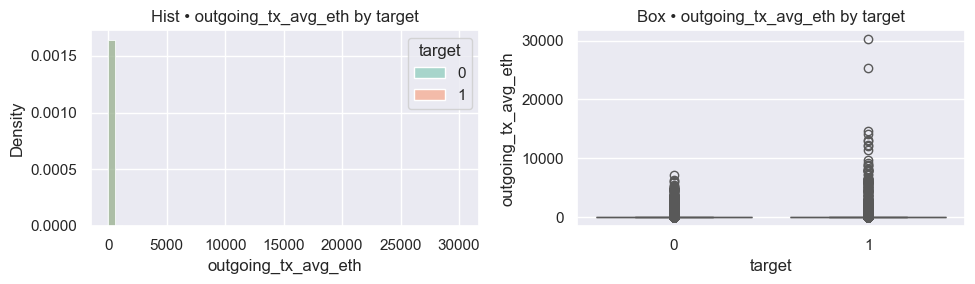

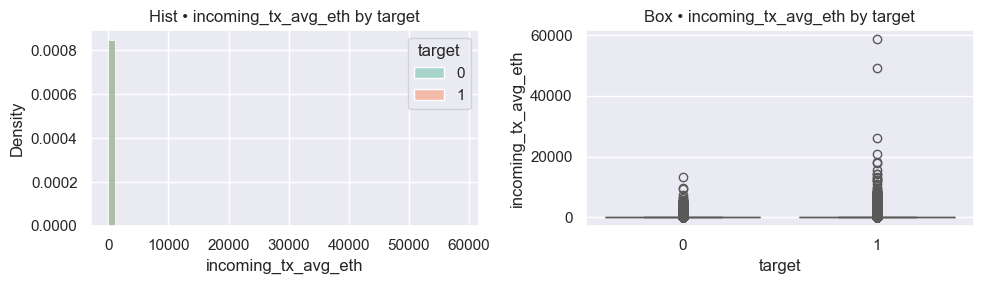

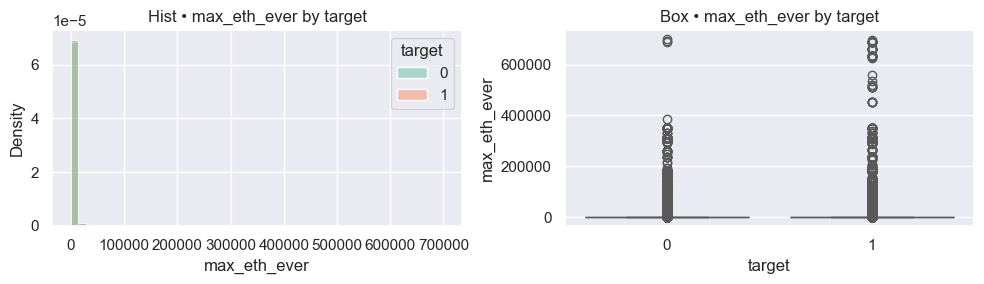

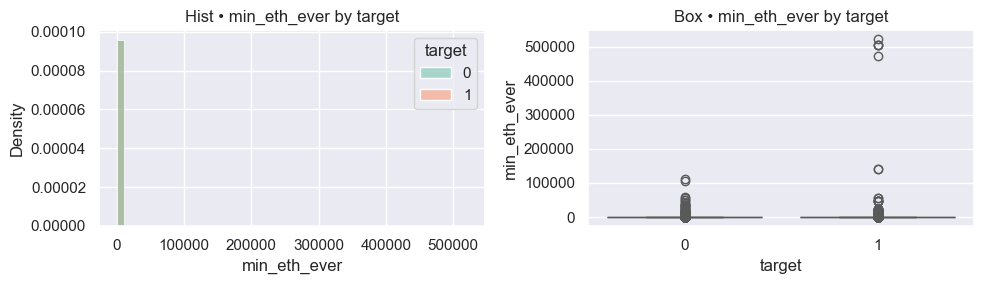

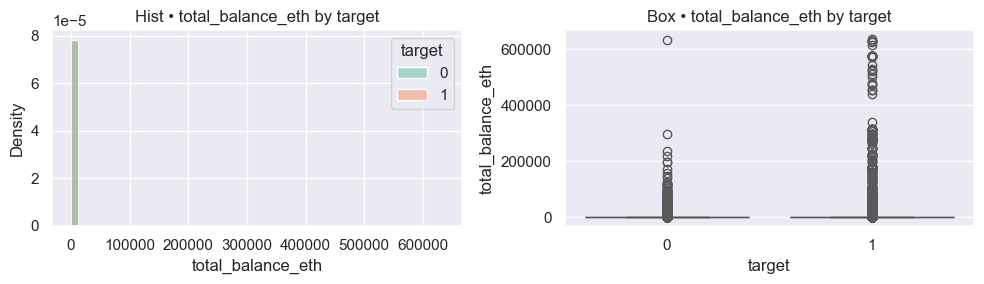

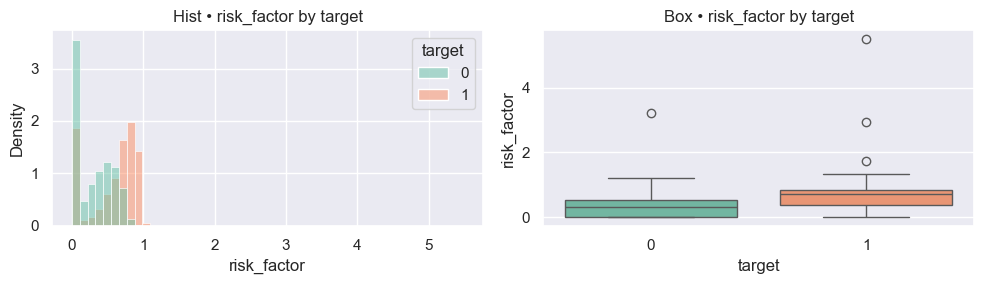

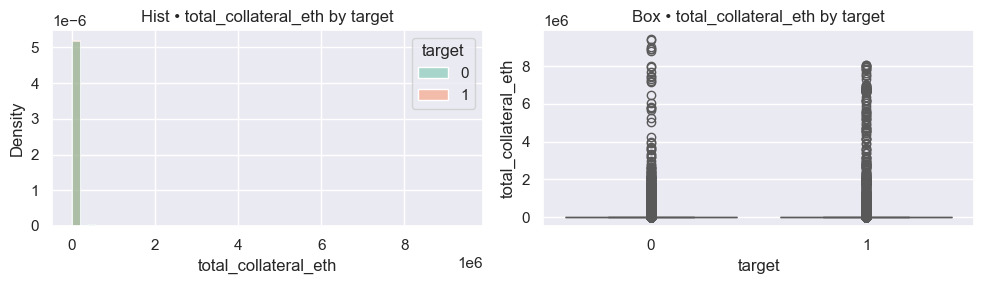

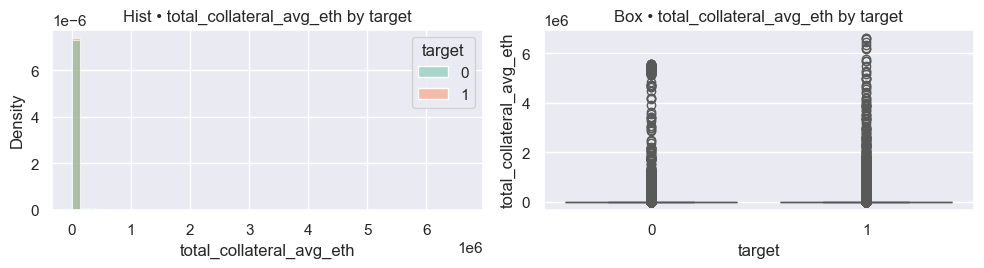

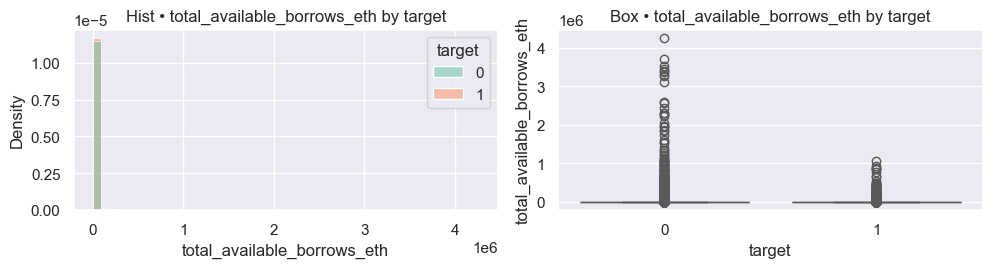

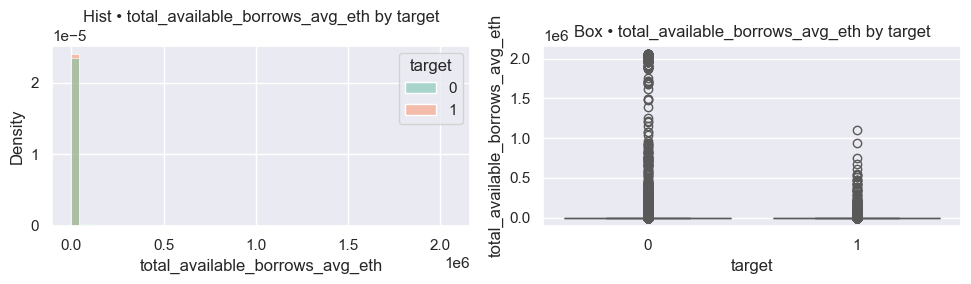

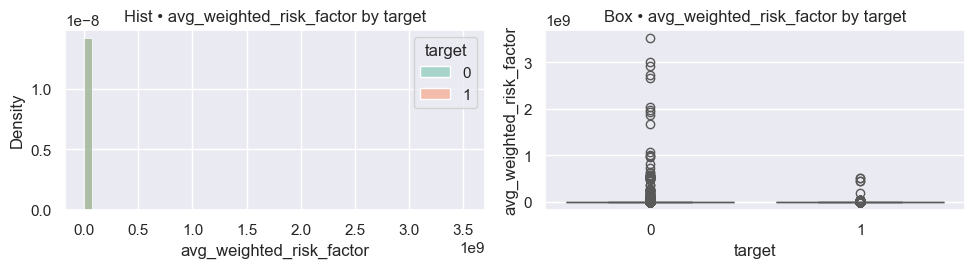

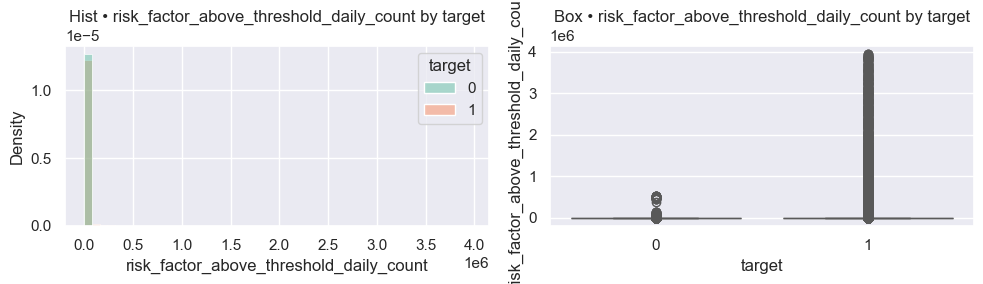

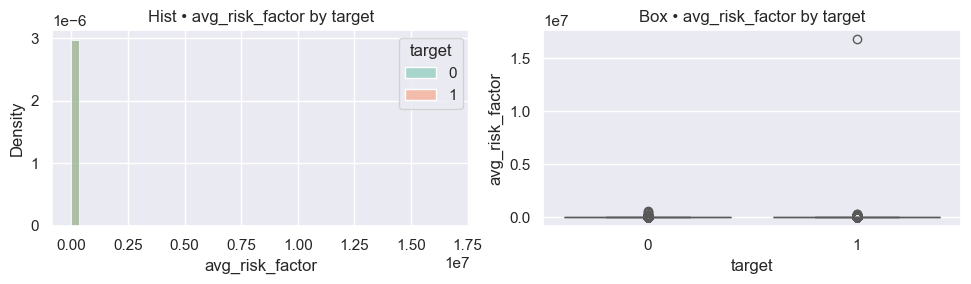

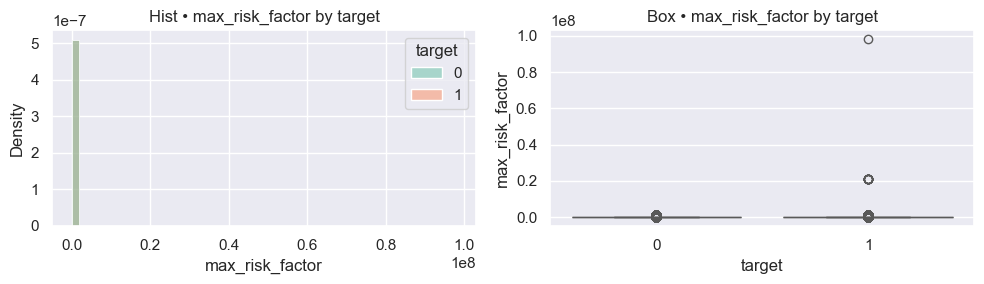

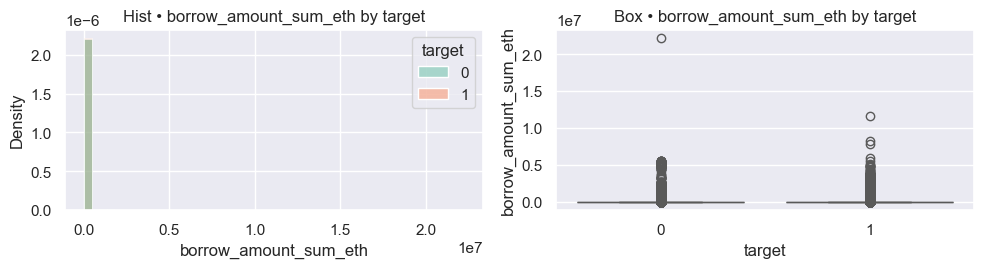

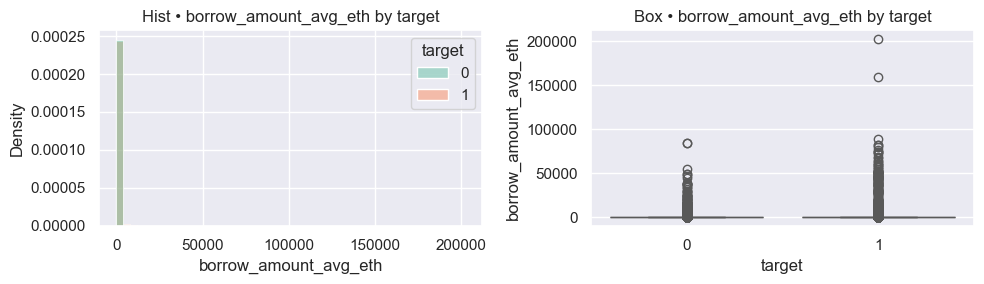

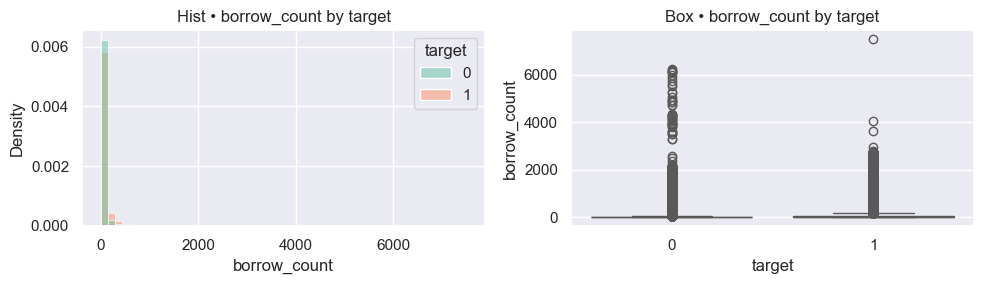

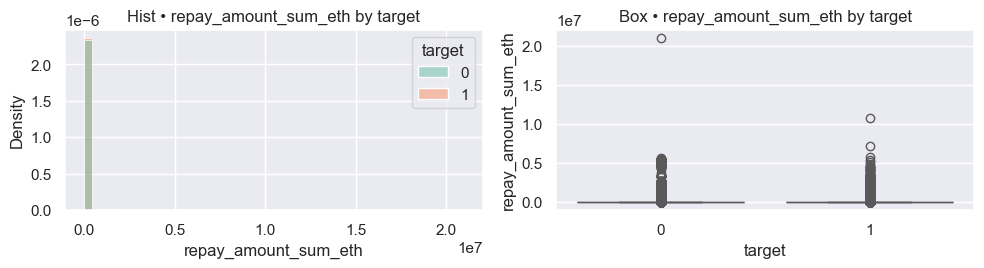

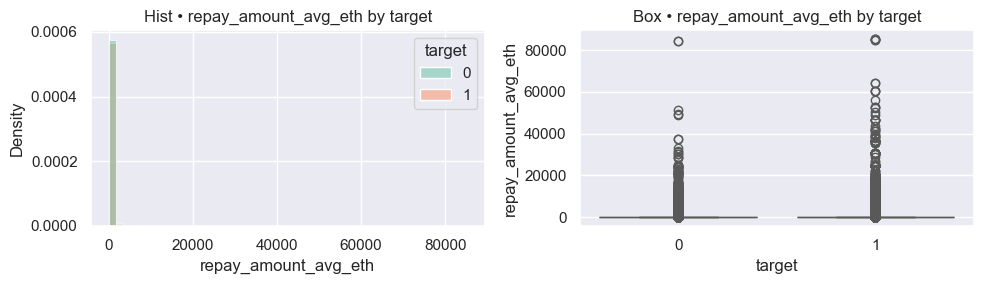

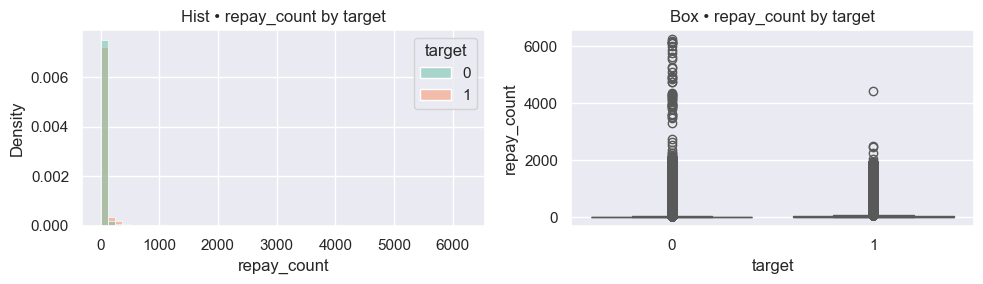

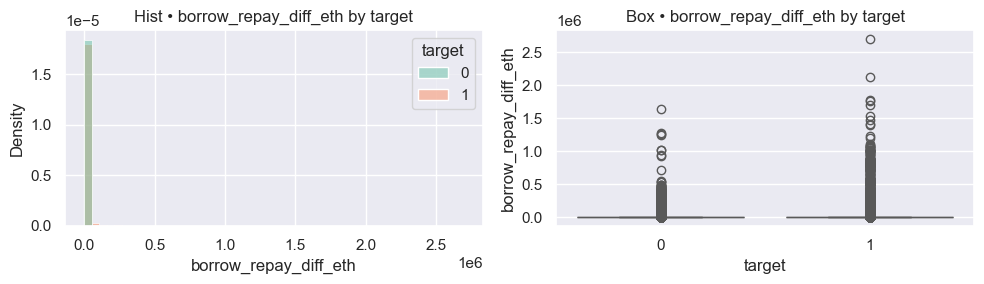

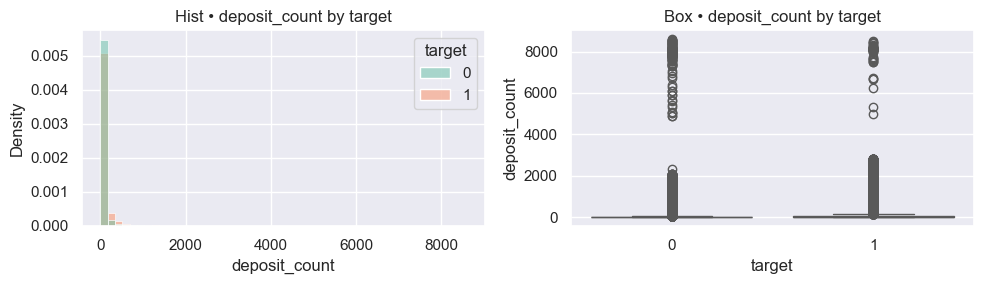

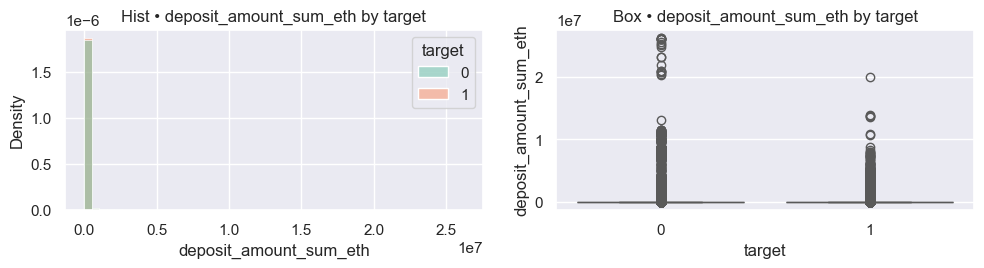

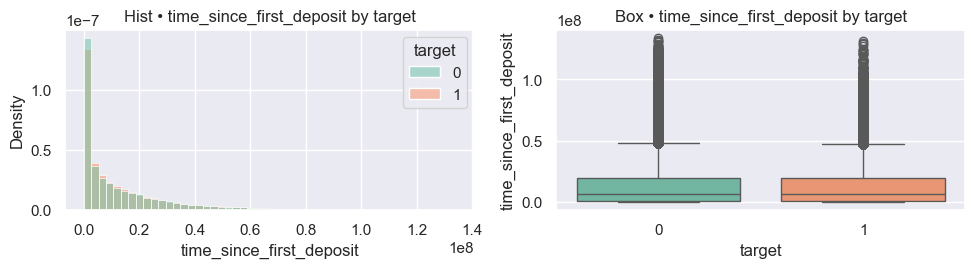

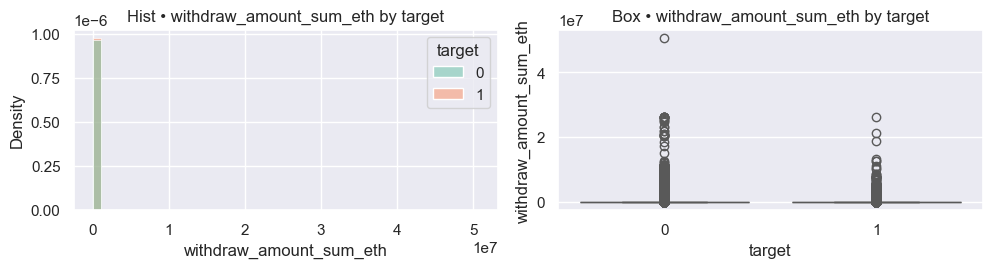

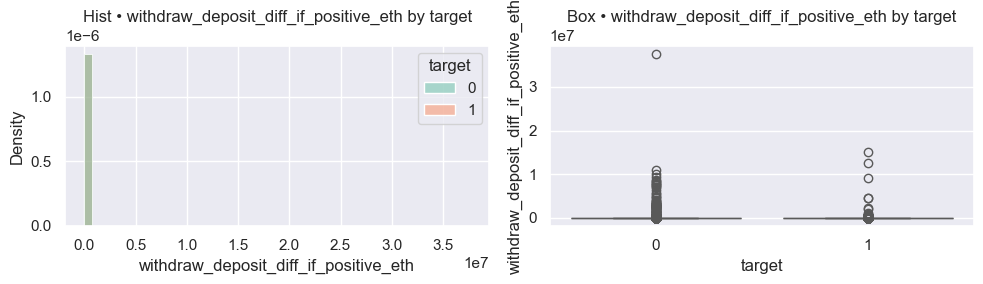

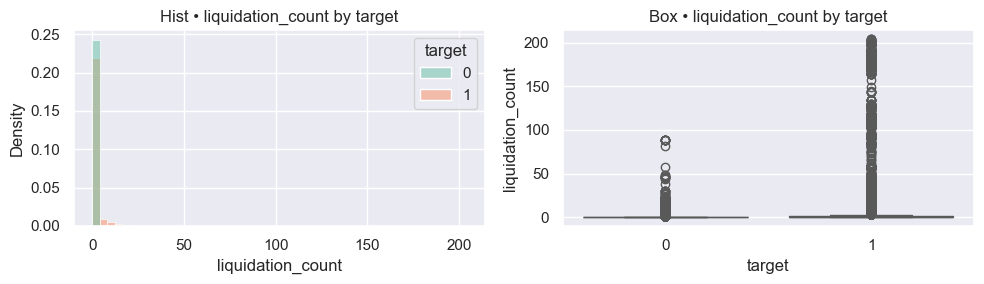

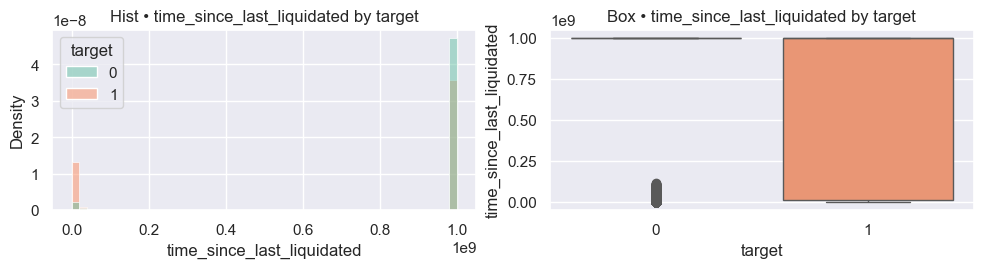

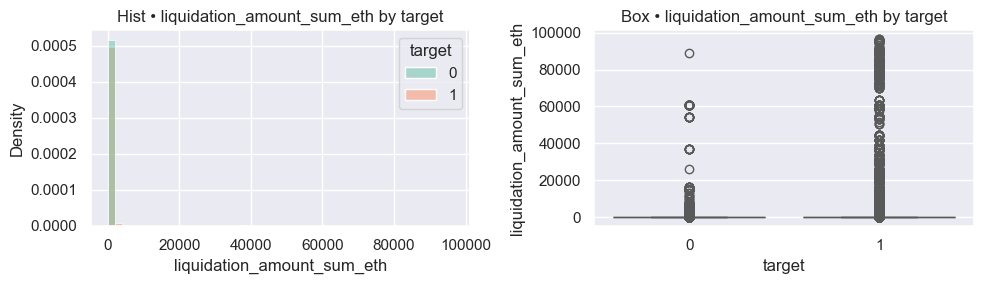

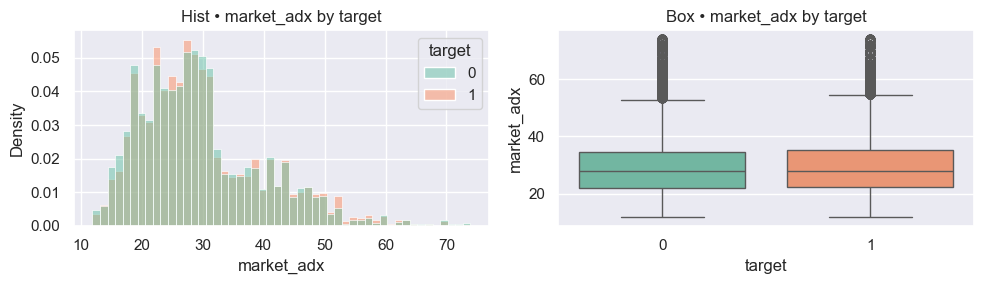

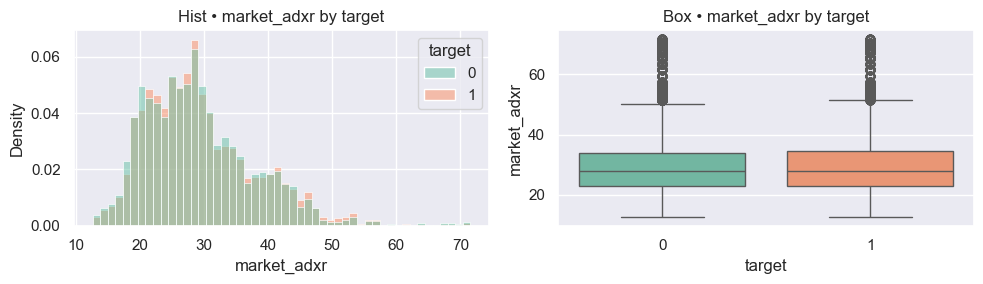

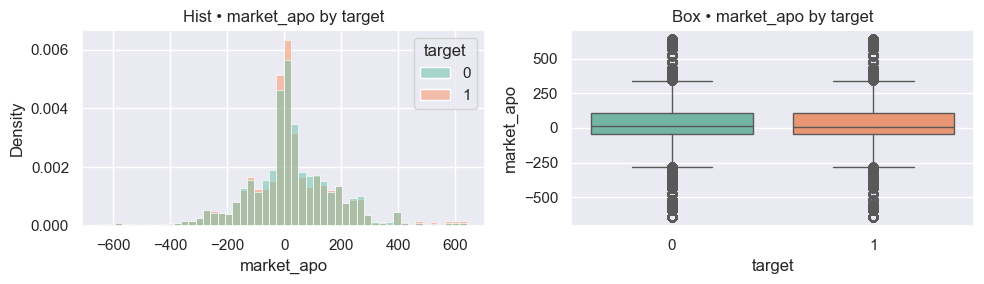

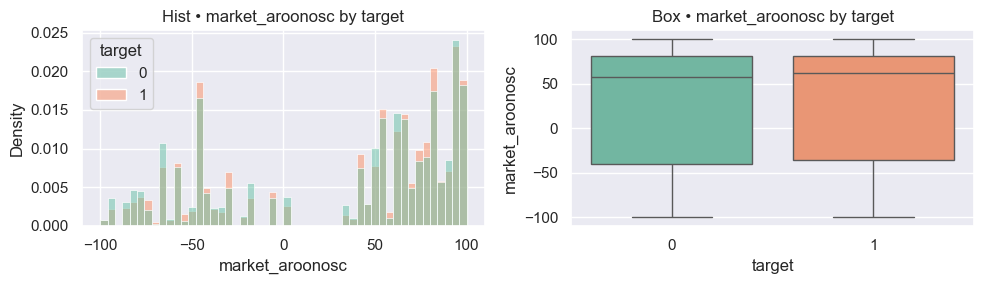

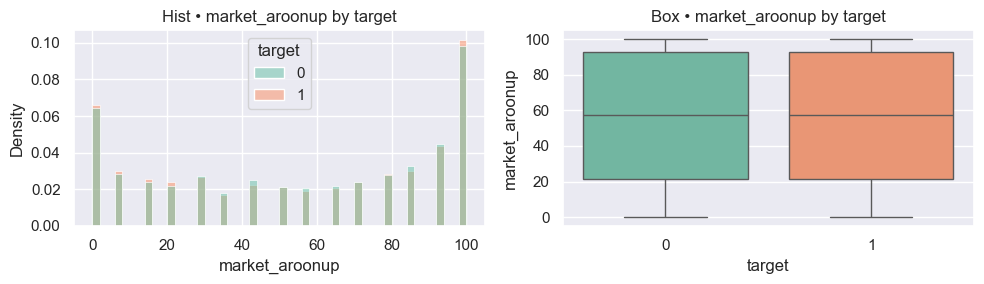

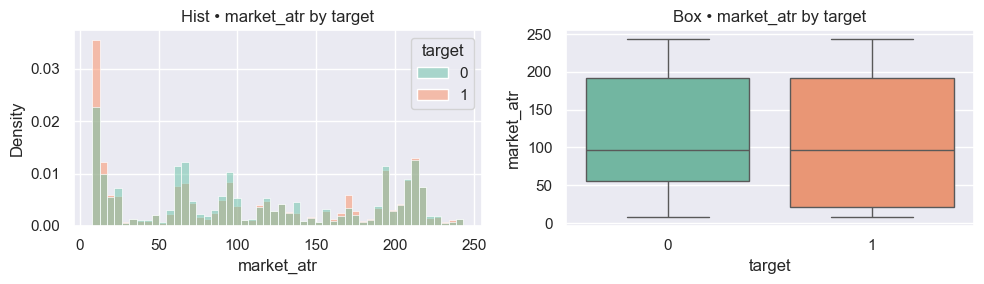

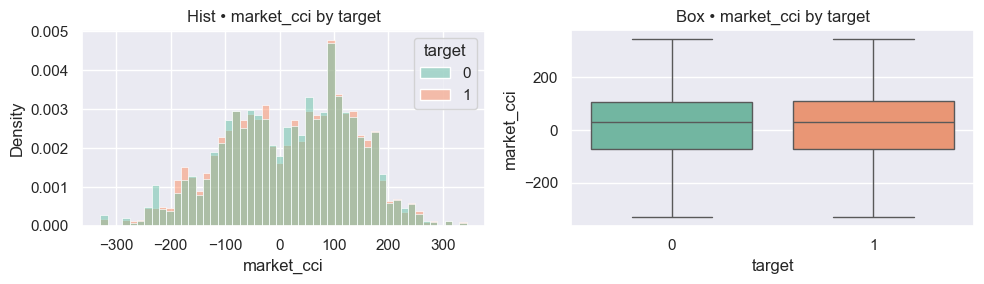

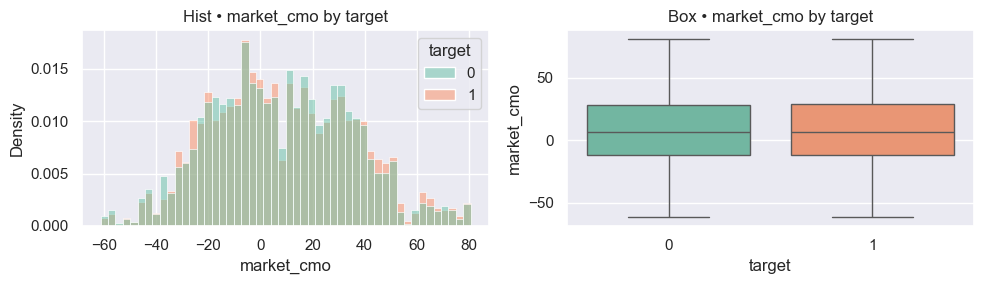

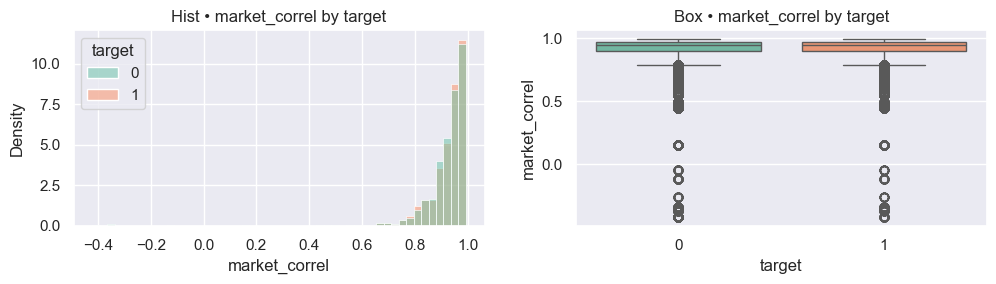

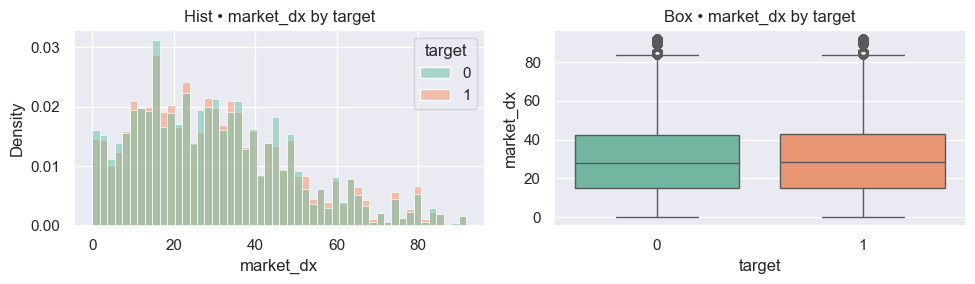

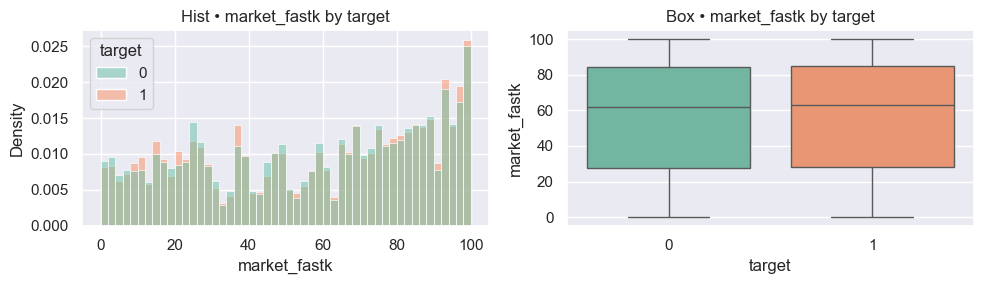

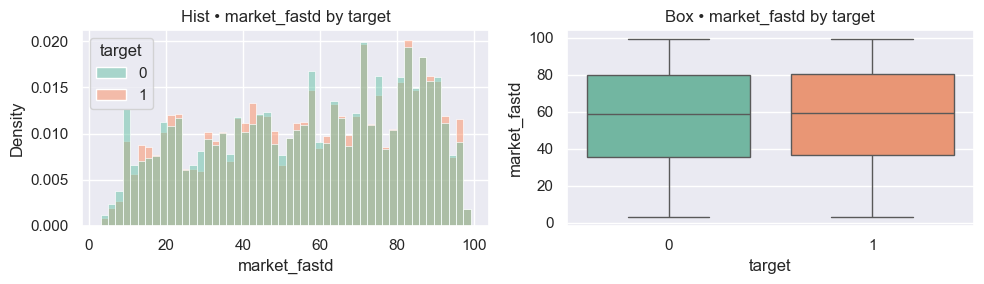

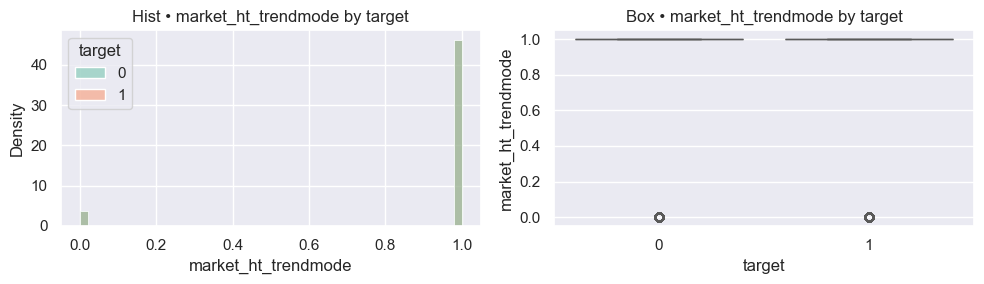

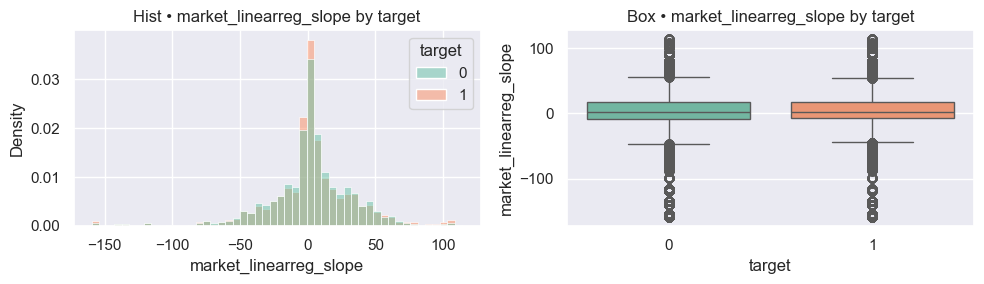

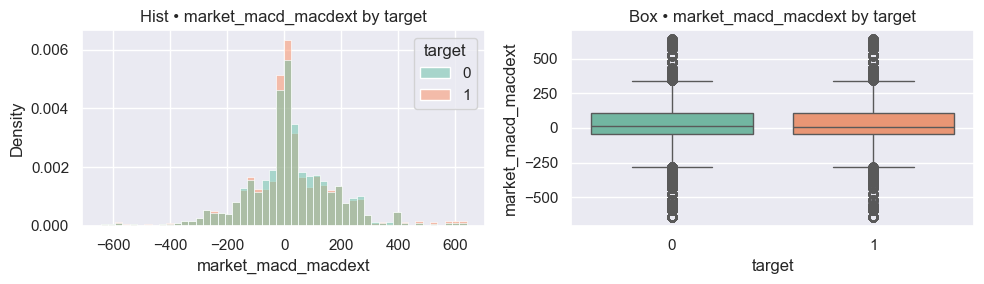

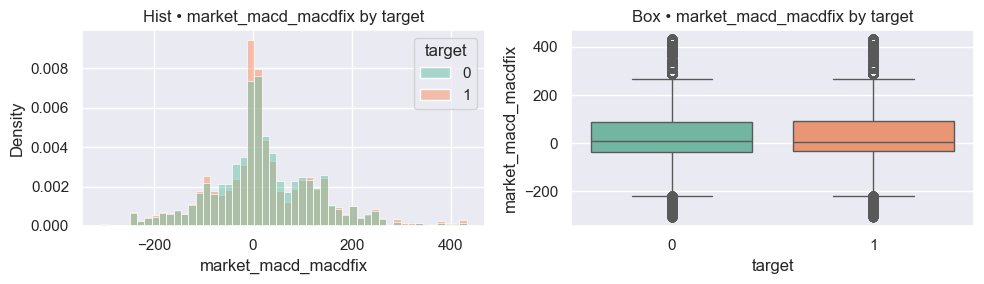

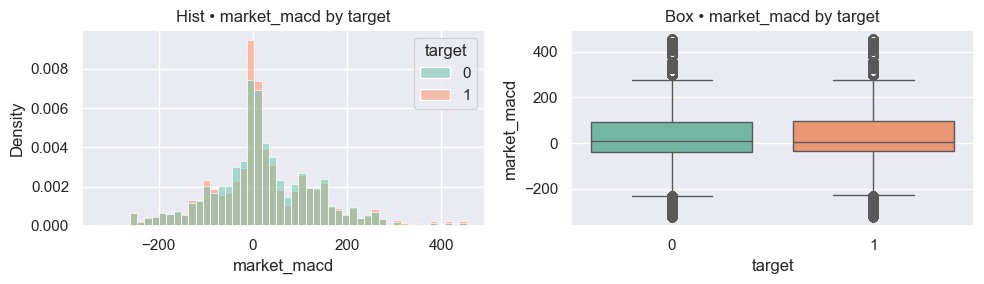

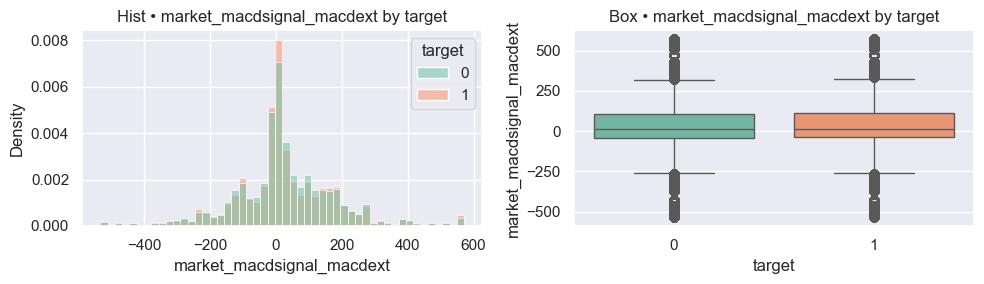

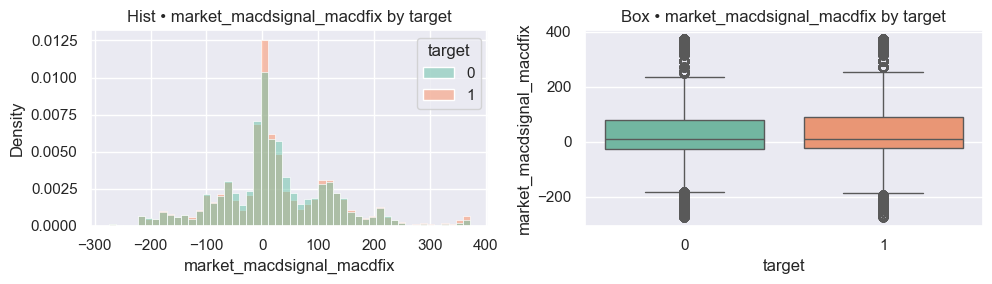

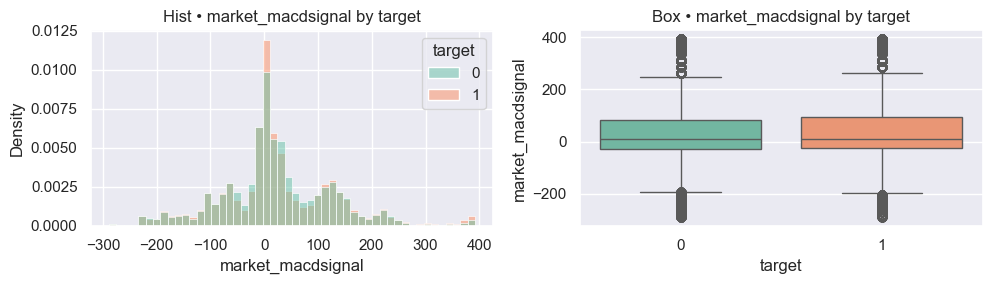

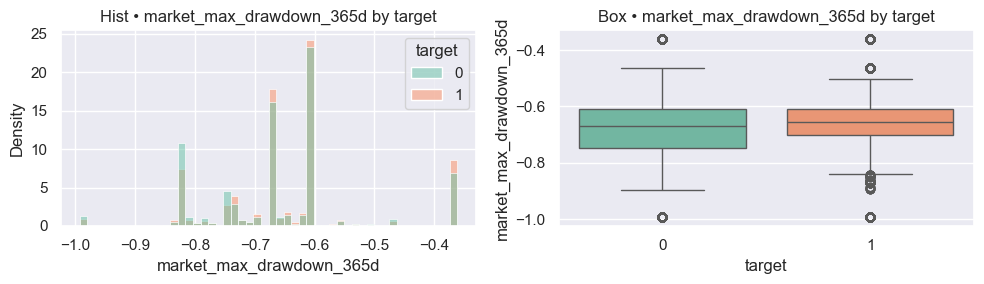

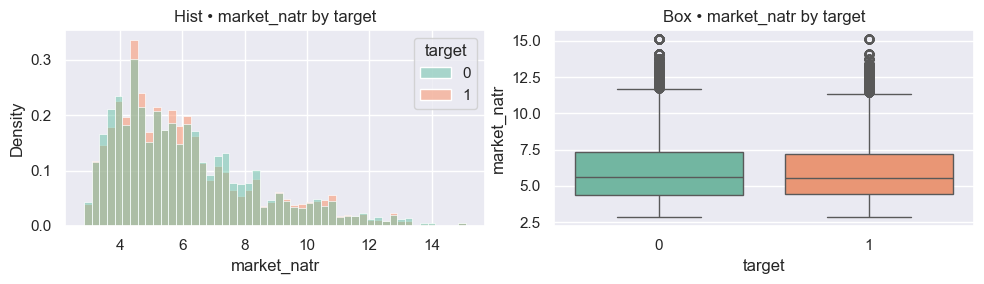

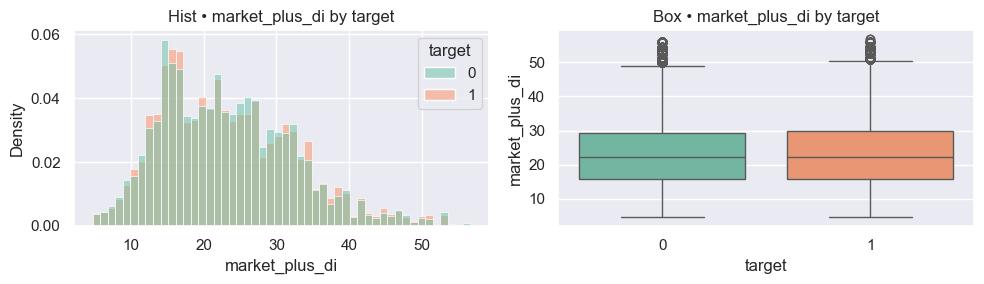

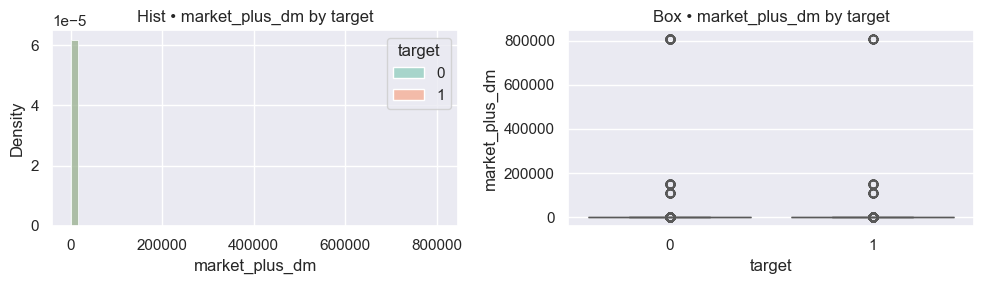

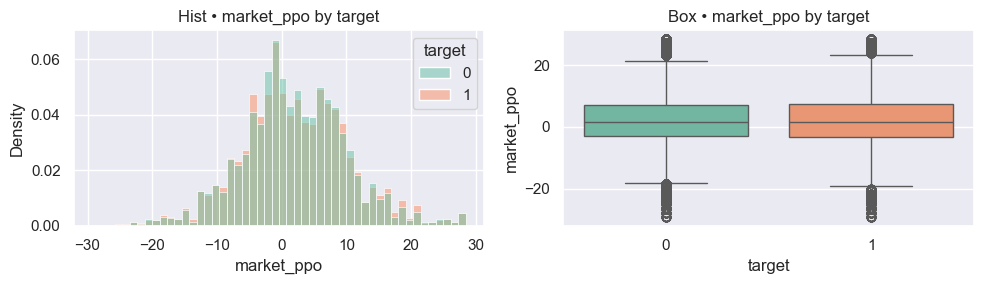

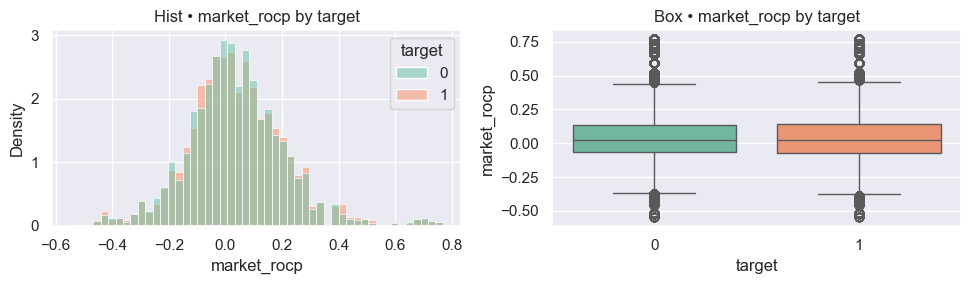

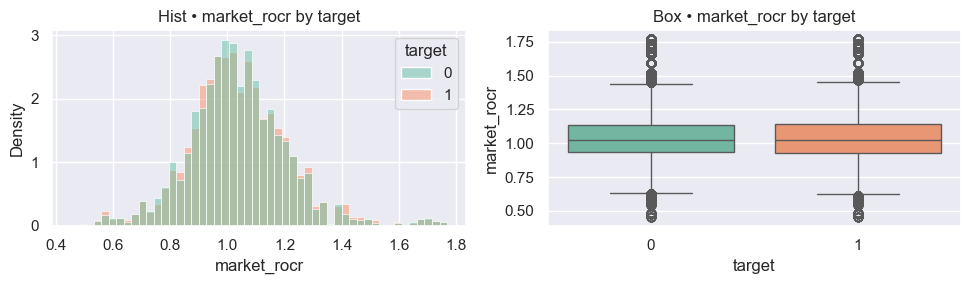

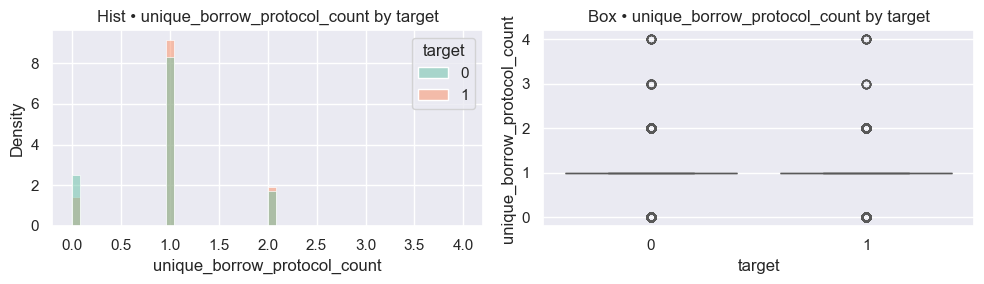

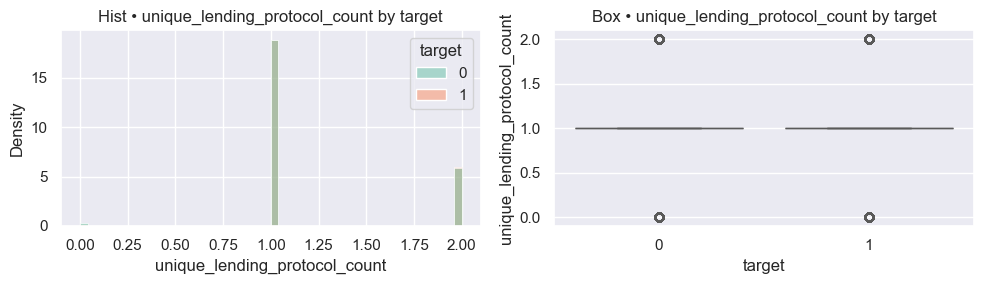

In [29]:
# Однофакторный числовой анализ по отношению к target
plot_univariate_by_target(
    df,
    features=features,    # можно оставить None, чтобы взять все числовые
    target="target",     # поменяйте при необходимости
    bins=50,
    sample=150_000,
    palette="Set2",
    max_plots=None,       # без лимита: строим для всех числовых из features
)


In [30]:
df["outgoing_tx_count"].value_counts()

outgoing_tx_count
3        3745
2        3523
6        3509
4        3274
7        3140
         ... 
14964       1
14094       1
10612       1
15619       1
23930       1
Name: count, Length: 19164, dtype: int64

In [31]:
train = df[df["subset"] == "train"]
val = df[df["subset"] == "val"]
test = df[df["subset"] == "test"]

In [32]:
params = dict(
    criterion='gini',          # 'gini' | 'entropy' | 'log_loss' (для вероятностей)
    splitter='best',           # 'best' | 'random'
    max_depth=16,            # ограничить, например 6–12, чтобы не переобучаться
    min_samples_split=4,       # мин. объектов для сплита (int или доля [0,1))
    min_samples_leaf=4,        # мин. объектов в листе
    min_weight_fraction_leaf=0.0,
    max_features=None,         # None | 'sqrt' | 'log2' | int | float
    random_state=42,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0, # порог прироста для сплита
    class_weight='balanced',         # None | 'balanced' | dict
    ccp_alpha=0.0              # cost-complexity pruning; >0 = пост-обрезка
)

In [33]:
clf = DecisionTreeClassifier(**params)

In [34]:
X_tr = train[features]
y_tr = train['target']
X_va = val[features]
y_va = val['target']

X_full = pd.concat([X_tr, X_va], axis=0)
y_full = pd.concat([y_tr, y_va], axis=0)

In [35]:
cat_cols = X_tr.select_dtypes(include=['object','category']).columns.tolist()
cat_idx = [X_tr.columns.get_loc(c) for c in cat_cols]

clf = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=4,
    l2_leaf_reg=2.0,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=10,
    od_type='Iter',
    od_wait=100
)
clf.fit(X_tr, y_tr, cat_features=cat_idx, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	total: 11.7ms	remaining: 11.7s
10:	total: 111ms	remaining: 10s
20:	total: 207ms	remaining: 9.65s
30:	total: 301ms	remaining: 9.42s
40:	total: 399ms	remaining: 9.34s
50:	total: 497ms	remaining: 9.25s
60:	total: 596ms	remaining: 9.17s
70:	total: 693ms	remaining: 9.06s
80:	total: 792ms	remaining: 8.99s
90:	total: 895ms	remaining: 8.94s
100:	total: 989ms	remaining: 8.8s
110:	total: 1.09s	remaining: 8.71s
120:	total: 1.19s	remaining: 8.63s
130:	total: 1.28s	remaining: 8.49s
140:	total: 1.38s	remaining: 8.39s
150:	total: 1.47s	remaining: 8.25s
160:	total: 1.56s	remaining: 8.13s
170:	total: 1.65s	remaining: 8s
180:	total: 1.74s	remaining: 7.89s
190:	total: 1.83s	remaining: 7.77s
200:	total: 1.93s	remaining: 7.67s
210:	total: 2.02s	remaining: 7.58s
220:	total: 2.13s	remaining: 7.5s
230:	total: 2.22s	remaining: 7.38s
240:	total: 2.31s	remaining: 7.28s
250:	total: 2.4s	remaining: 7.18s
260:	total: 2.5s	remaining: 7.08s
270:	total: 2.59s	remaining: 6.98s
280:	total: 2.68s	remaining: 6.87s
290:

In [36]:
clf.score(val[features], val['target'])

np.float64(0.8241)

In [37]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

X_va, y_va = val[features], val['target']

y_pred = clf.predict(X_va)
y_proba = clf.predict_proba(X_va)[:, 1]  # для деревьев есть predict_proba

print('accuracy:', accuracy_score(y_va, y_pred))
print('f1:',       f1_score(y_va, y_pred))
print('roc_auc:',  roc_auc_score(y_va, y_proba))
print('confusion_matrix:\n', confusion_matrix(y_va, y_pred))
print(classification_report(y_va, y_pred))

accuracy: 0.8241
f1: 0.7373842938190505
roc_auc: 0.8892578989822547
confusion_matrix:
 [[57715  4839]
 [12751 24695]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     62554
           1       0.84      0.66      0.74     37446

    accuracy                           0.82    100000
   macro avg       0.83      0.79      0.80    100000
weighted avg       0.83      0.82      0.82    100000



In [38]:
X_te, y_te = test[features], test['target']

y_pred  = clf.predict(X_te)
y_proba = clf.predict_proba(X_te)[:, 1]

print('accuracy:', accuracy_score(y_te, y_pred))
print('f1:', f1_score(y_te, y_pred))
print('roc_auc:', roc_auc_score(y_te, y_proba))
print('pr_auc (AP):', average_precision_score(y_te, y_proba))
print('confusion_matrix:\n', confusion_matrix(y_te, y_pred))
print(classification_report(y_te, y_pred))

accuracy: 0.8228537852980883
f1: 0.7347528724195356
roc_auc: 0.888873109872988
pr_auc (AP): 0.8582397111786748
confusion_matrix:
 [[82560  6892]
 [18433 35076]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     89452
           1       0.84      0.66      0.73     53509

    accuracy                           0.82    142961
   macro avg       0.83      0.79      0.80    142961
weighted avg       0.82      0.82      0.82    142961



,feature,mean_abs_shap
23,risk_factor,0.897725
31,max_risk_factor,0.706506
41,time_since_first_deposit,0.212286
30,avg_risk_factor,0.164955
27,total_available_borrows_avg_eth,0.164313
29,risk_factor_above_threshold_daily_count,0.141094
26,total_available_borrows_eth,0.123663
45,time_since_last_liquidated,0.094588
22,total_balance_eth,0.069865
0,borrow_block_number,0.067828


<Figure size 800x600 with 0 Axes>

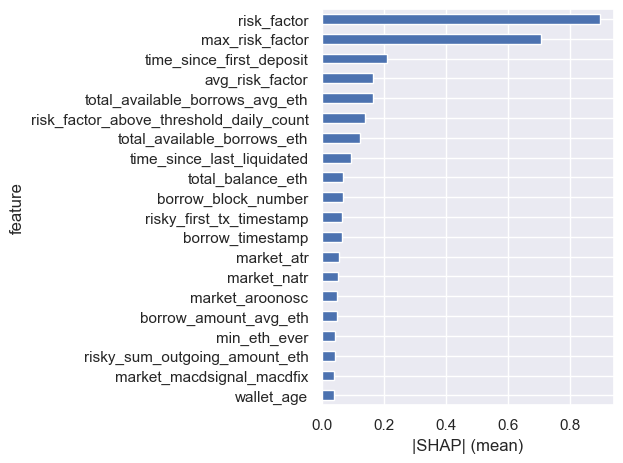

In [43]:
pool_te = Pool(X_te, cat_features=cat_idx if cat_idx else None)

sv = clf.get_feature_importance(pool_te, type='ShapValues')  # (n, f+1) или (n, K, f+1)

shap_values = sv[:, :-1] if sv.ndim == 2 else sv[:, 0, :-1]


feat_names = X_te.columns
mean_abs = np.abs(shap_values).mean(axis=0)
imp_df = pd.DataFrame({"feature": feat_names, "mean_abs_shap": mean_abs}).sort_values("mean_abs_shap", ascending=False)


from IPython.display import display
display(imp_df.head(20))


plt.figure(figsize=(8, 6))
imp_df.head(20).iloc[::-1].plot(kind="barh", x="feature", y="mean_abs_shap", legend=False)
plt.xlabel("|SHAP| (mean)")
plt.ylabel("feature")
plt.tight_layout()
plt.show()

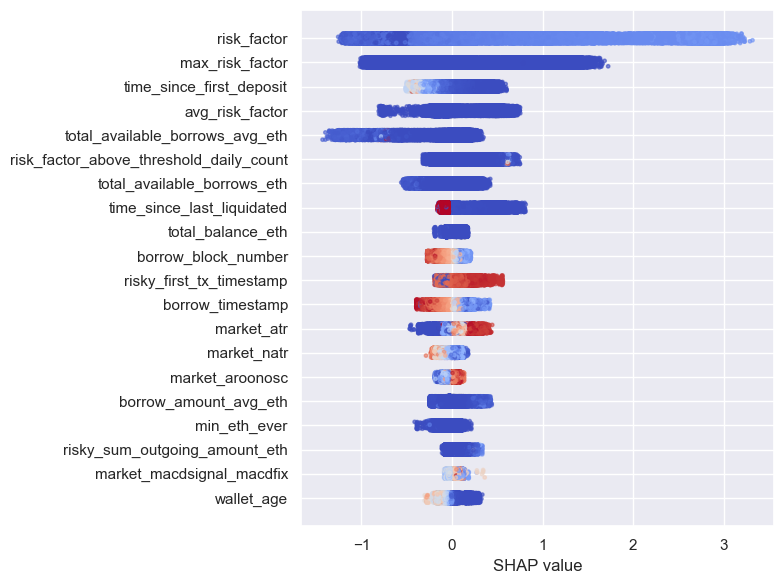

In [44]:
feat_names = X_te.columns
order = np.argsort(np.abs(shap_values).mean(0))[::-1][:20]

plt.figure(figsize=(8,6))
for pos, j in enumerate(order):
    y = np.full(len(X_te), pos) + (np.random.rand(len(X_te))-0.5)*0.4
    c = X_te.iloc[:, j]
    plt.scatter(shap_values[:, j], y, c=c, cmap='coolwarm', s=6, alpha=0.6)
plt.yticks(range(len(order)), feat_names[order])
plt.xlabel("SHAP value"); plt.gca().invert_yaxis(); plt.tight_layout(); plt.show()